In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np

In [2]:
Bias = []
for i in range(1,10):
    Bias.append(fits.getdata("Bias-000{}.fit".format(i) , ext=0).astype(np.int))
Bias.append(fits.getdata("Bias-0010.fit".format(i) , ext=0).astype(np.int))
bias = np.array(Bias)
read_noise = bias.std(axis=0).mean()
bias_mean = bias.mean(axis=0).mean()
avbias1= bias.mean(axis=0)

In [3]:
Dark = []
for i in range(1,10):
    Dark.append(fits.getdata("Dark-000{}.fit".format(i) , ext=0).astype(np.int))
Dark.append(fits.getdata("Dark-0010.fit".format(i) , ext=0).astype(np.int))

Darkbs = [ei - avbias1 for ei in Dark]


In [4]:
Flat75 = []
for i in range(1,10):
    Flat75.append(fits.getdata("Flat75-000{}.fit".format(i) , ext=0).astype(np.int))
Flat75.append(fits.getdata("Flat75-0010.fit".format(i) , ext=0).astype(np.int))

In [5]:
Flat190 = []
for i in range(1,10):
    Flat190.append(fits.getdata("Flat190-000{}.fit".format(i) , ext=0).astype(np.int))
Flat190.append(fits.getdata("Flat190-0010.fit".format(i) , ext=0).astype(np.int))

In [6]:
Flat255 = []
for i in range(1,10):
    Flat255.append(fits.getdata("Flat255-000{}.fit".format(i) , ext=0).astype(np.int))
Flat255.append(fits.getdata("Flat255-0010.fit".format(i) , ext=0).astype(np.int))

In [7]:
Flat75_sub_bias = [half - avbias1 for half in Flat75]
a1 = np.array(Flat75_sub_bias)

b1 = a1.var(axis=0).mean()
c1= a1.mean(axis=0).mean()
print(b1,c1)

6389.475574119288 3194.994277982652


In [8]:
Flat190_sub_bias = [half - avbias1 for half in Flat190]
a2 = np.array(Flat190_sub_bias)

b2= a2.var(axis=0).mean()
c2= a2.mean(axis=0).mean()
print(b2,c2)

45570.76881284473 21016.132420694536


In [9]:
Flat255_sub_bias = [half - avbias1 for half in Flat255]
a3 = np.array(Flat255_sub_bias)

b3 = a3.var(axis=0).mean()
c3 =a3.mean(axis=0).mean()
print(b3,c3)

68983.71150655876 27502.51351138237


In [10]:
Bias_Day_2 = []
for i in range(1,10):
    Bias_Day_2.append(fits.getdata("Bias_Day_2-000{}.fit".format(i) , ext=0).astype(np.int))
Bias_Day_2.append(fits.getdata("Bias_Day_2-0010.fit".format(i) , ext=0).astype(np.int))

for i in range(11,20):
    Bias_Day_2.append(fits.getdata("Bias_Day_2-00{}.fit".format(i) , ext=0).astype(np.int))
Bias_Day_2.append(fits.getdata("Bias_Day_2-0020.fit".format(i) , ext=0).astype(np.int))

for i in range(21,30):
    Bias_Day_2.append(fits.getdata("Bias_Day_2-00{}.fit".format(i) , ext=0).astype(np.int))
Bias_Day_2.append(fits.getdata("Bias_Day_2-0030.fit".format(i) , ext=0).astype(np.int))

bias2 = np.array(Bias_Day_2)
read_noise = bias2.std(axis=0).mean()
bias2_mean = bias2.mean(axis=0).mean()
avbias2= sum(Bias_Day_2)/30
avbias2 = avbias2.mean(axis=0).mean()

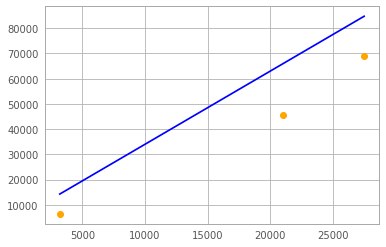

In [11]:
from scipy.optimize import curve_fit 
mean = [c1,c2,c3]
mean = np.array(mean)
var = [b1,b2,b3]
var = np.array(var)

def func (x,m,b):
    return m*x+b

m0 =2.9
b0 = 5000
plt.scatter(mean,var, color = "orange" )
plt.plot(mean,func(mean,m0,b0), color = "blue")

m=2.4950838693157937, b=-2695.304537967293


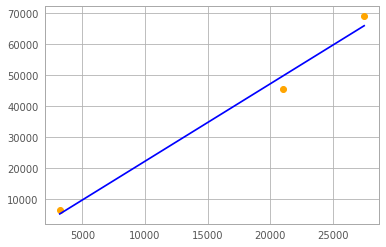

The gain is  0.40078813073094083
The read noise is 20.577374672489903


In [12]:
from scipy.optimize import curve_fit 
# exectute the curve fit...
coeffs, fiterr = curve_fit(func, mean,var,p0 = (m0,b0))

print ("m=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.scatter(mean,var, color = "orange")
plt.plot(mean,func(mean,*coeffs), color = "blue")
plt.show()
m_error = np.sqrt(fiterr[0][0])
b_error = np.sqrt(fiterr[1][1])
print("The gain is ",1/coeffs[0])
print("The read noise is", read_noise)
gain=1/coeffs[0]

# Part 2

In [13]:
DarkAA1 = []
DarkAA1.append(fits.getdata("GroupAADark_Day_2_6cexp900-0001.fit".format(i) , ext=0).astype(np.int))
DarkAA1_sub_bias = [half - avbias2 for half in DarkAA1]
a= (np.array(DarkAA1_sub_bias).mean())*gain
print(a)

73.46244332336288


In [14]:
DarkAA2 = []
DarkAA2.append(fits.getdata("GroupAADark_Day_2_9cexp300-0001.fit".format(i) , ext=0).astype(np.int))

DarkAA2_sub_bias = [half - avbias2 for half in DarkAA2]
b= np.array(DarkAA2_sub_bias).mean()*gain

In [15]:
DarkA1 = []
DarkA1.append(fits.getdata("GroupADarkT4.6Exp450.fit".format(i) , ext=0).astype(np.int))
DarkA1_sub_bias = [half - avbias2 for half in DarkA1]
c= np.array(DarkA1_sub_bias).mean()*gain

In [16]:
DarkA2 = []
DarkA2.append(fits.getdata("GroupADarkT8.9Exp300.fit".format(i) , ext=0).astype(np.int))
DarkA2_sub_bias = [half - avbias2 for half in DarkA2]
d= np.array(DarkA2_sub_bias).mean()*gain

In [17]:
DarkB1 = []
DarkB1.append(fits.getdata("GroupBDarkT6Exp300.fit".format(i) , ext=0).astype(np.int))
DarkB1_sub_bias = [half - avbias2 for half in DarkB1]
e= np.array(DarkB1_sub_bias).mean()*gain

In [18]:
DarkB2 = []
DarkB2.append(fits.getdata("GroupBDarkT9Exp600.fit".format(i) , ext=0).astype(np.int))

DarkB2_sub_bias = [half - avbias2 for half in DarkB2]
f= np.array(DarkB2_sub_bias).mean()*gain

In [19]:
DarkBB1 = []
DarkBB1.append(fits.getdata("GroupBBDarkT7Exp400.fit".format(i) , ext=0).astype(np.int))
DarkBB1_sub_bias = [half - avbias2 for half in DarkBB1]
g= np.array(DarkBB1_sub_bias).mean()*gain

In [20]:
DarkBB2 = []
DarkBB2.append(fits.getdata("GroupBBDarkT8Exp400.fit".format(i) , ext=0).astype(np.int))
DarkBB2_sub_bias = [half - avbias2 for half in DarkBB2]
h= np.array(DarkBB2_sub_bias).mean()*gain

In [21]:
DarkC1 = []
DarkC1.append(fits.getdata("GroupCDarkT7.1Exp400.fit".format(i) , ext=0).astype(np.int))
DarkC1_sub_bias = [half - avbias2 for half in DarkC1]
i= np.array(DarkC1_sub_bias).mean()*gain

In [22]:
DarkC2 = []
DarkC2.append(fits.getdata("GroupCDarkT9.4Exp300.fit".format(i) , ext=0).astype(np.int))
DarkC2_sub_bias = [half - avbias2 for half in DarkC2]
j= np.array(DarkC2_sub_bias).mean()*gain

In [23]:
DarkD1 = []
DarkD1.append(fits.getdata("GroupDDarkT7Exp600.fit".format(i) , ext=0).astype(np.int))
DarkD1_sub_bias = [half - avbias2 for half in DarkD1]
k= np.array(DarkD1_sub_bias).mean()*gain

In [24]:
DarkD2 = []
DarkD2.append(fits.getdata("GroupDDarkT9.4Exp300.fit".format(i) , ext=0).astype(np.int))
DarkD2_sub_bias = [half - avbias2 for half in DarkD2]
l= np.array(DarkD2_sub_bias).mean()*gain

[0.08020426920130284, 0.08162493702595876, 0.08290822188057403, 0.08468358904329713, 0.08671164703856253, 0.08765861526211877, 0.08997359847738956, 0.1043631499629822, 0.10660997963709025, 0.10693934589769401, 0.10730938685352852, 0.10869677315130595]
[0.24170611 0.24292443 0.24292443 0.24379466 0.24379466 0.24388168
 0.24466489 0.24544809 0.24553512 0.24553512 0.24588321 0.24588321]


Text(0.5,1,'Temperature vs. Dark Current')

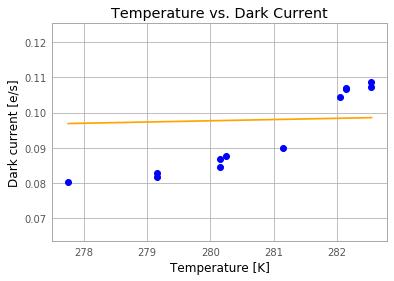

In [25]:
T_cel = [4.6,6,6,7,7,7.1,8,8.9,9,9,9.4,9.4] # Temperature in cel
T_k = [] #temperature in kelvin
for t in range(0,12):
    T_k.append(T_cel[t]+273.15)

Darkc=[c/450,a/900,e/300,l/300,g/400,i/400,h/400,d/300,b/300,f/600,k/600,j/300]
Darkc.sort()
Temp= np.array(T_k)
def func1 (A,Temp,E):
    k = 8.61733326 *10**-5 # In eV/K
    print(A*Temp**(3/2)*np.exp(-E/(2*k*Temp)))
    return .400788* A*Temp**(3/2)*np.exp(-E/(2*k*Temp))
print(Darkc)

A0=365
E0=1


plt.scatter(Temp,Darkc, color = "blue")
plt.plot(Temp,func1(Temp,A0,E0), color = "orange")
plt.xlabel("Temperature [K]")
plt.ylabel("Dark current [e/s]")
plt.title("Temperature vs. Dark Current")

[0.24170611 0.24292443 0.24292443 0.24379466 0.24379466 0.24388168
 0.24466489 0.24544809 0.24553512 0.24553512 0.24588321 0.24588321]
[0.24170611 0.24292443 0.24292443 0.24379466 0.24379466 0.24388168
 0.24466489 0.24544809 0.24553512 0.24553512 0.24588321 0.24588321]
[0.24170611 0.24292443 0.24292443 0.24379466 0.24379466 0.24388168
 0.24466489 0.24544809 0.24553512 0.24553512 0.24588321 0.24588321]
[0.24170617 0.24292449 0.24292449 0.24379472 0.24379472 0.24388175
 0.24466495 0.24544816 0.24553518 0.24553518 0.24588327 0.24588327]
[0.24170605 0.24292437 0.24292437 0.2437946  0.2437946  0.24388162
 0.24466483 0.24544804 0.24553506 0.24553506 0.24588315 0.24588315]
[nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan]
[1.31597875e+12 1.32261195e+12 1.32261195e+12 1.32734994e+12
 1.32734994e+12 1.32782374e+12 1.33208794e+12 1.33635214e+12
 1.33682594e+12 1.33682594e+12 1.33872114e+12 1.33872114e+12]
[0.23315785 0.23433308 0.23433308 0.23517

/Users/ryienh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/ryienh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/Users/ryienh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/Users/ryienh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,1,'Temperature vs. Dark Current')

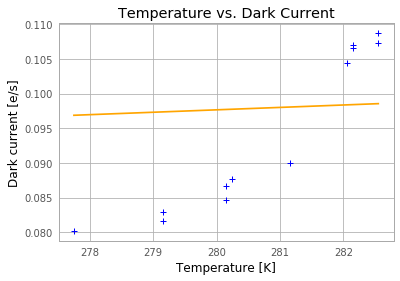

In [26]:
from scipy.optimize import curve_fit 
# exectute the curve fit...
coeffs1, fiterr1 = curve_fit(func1,Temp,Darkc,p0 = (A0,E0))

print ("A=%s, E=%s" % (coeffs1[0], coeffs1[1]))
plt.plot(Temp,Darkc,"+", color = "blue")
plt.plot(Temp,func1(Temp,A0,E0), color = "orange")
#plt.show()
A_error = np.sqrt(fiterr1[0][0])
E_error = np.sqrt(fiterr1[1][1])
print("The error of A is ",A_error)
print("The error in E is", E_error)
plt.xlabel("Temperature [K]")
plt.ylabel("Dark current [e/s]")
plt.title("Temperature vs. Dark Current")